In [1]:
import numpy as np
from obspy import UTCDateTime
import obspy as obs
from obspy.clients.fdsn import Client as FDSN_Client
import numpy as np
from matplotlib import pyplot as plt
import sys
from ground_motion_qh import extract_pairs

In [2]:
t1 = UTCDateTime("2009-03-24")
t2 = UTCDateTime("2009-03-30")
stname = ["SND"]
network = "AZ"
org = "IRIS"

client = FDSN_Client(org)

for i, comp in enumerate(["HHE", "HHN", "HHZ"]):
    land_st1 = client.get_waveforms(network, str(stname[0]), "*", str(comp), t1, t2)
land_st1_original = land_st1.copy()
land_st1 = land_st1_original.copy()
land_st1.detrend()
land_st1.taper(max_percentage=0.05)
land_st1.filter("highpass", freq=2)

In [26]:
 land_st1[0]

AZ.SND..HHZ | 2009-03-24T00:00:00.000000Z - 2009-03-30T00:00:00.000000Z | 100.0 Hz, 51840001 samples

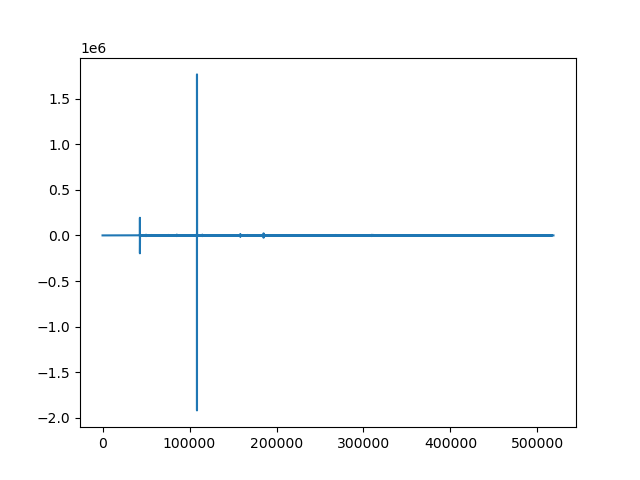

In [30]:
%matplotlib widget
fig, ax = plt.subplots()
plt.plot(land_st1[0].times(), land_st1[0].data)

[None]

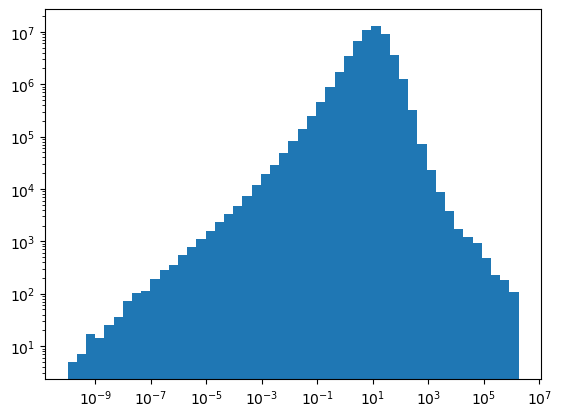

In [19]:
fig, ax = plt.subplots()
epsilon = 1e-10
bins = np.logspace(
    np.log10(epsilon), 
    np.log10(np.max(land_st1[0].data)),
)

ax.hist(np.abs(land_st1[0].data), bins=bins, log=True)
ax.set(xscale='log')

np.float64(0.85)

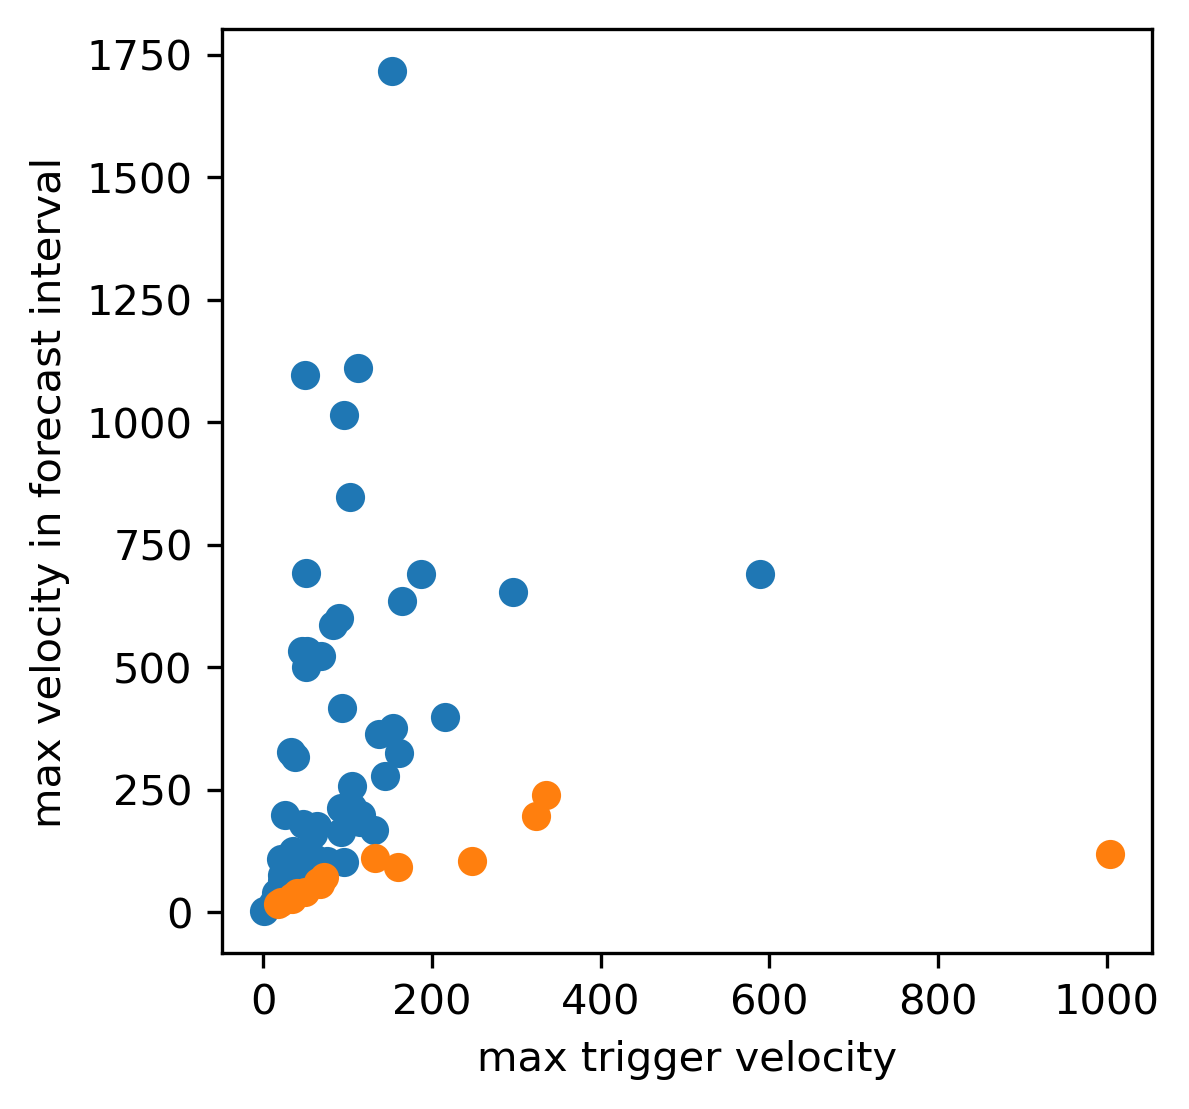

In [ ]:
selected_times = np.random.choice(land_st1[0].times(), 100, replace=False)
a_minus_vector, a_plus_vector = extract_pairs.waveform_to_max_amp_pairs(
    selected_times,
    land_st1[0].data,
    land_st1[0].times(),
    # tw_minus=TW_MINUS,
    # tw_plus=TW_PLUS,
    # tw_buffer=TW_BUFFER,
)
above_logical = a_plus_vector > a_minus_vector

fig, ax = plt.subplots(dpi=300, figsize=(4, 4))
ax.scatter(a_minus_vector[above_logical], a_plus_vector[above_logical])
ax.scatter(a_minus_vector[~above_logical], a_plus_vector[~above_logical])
ax.set_xlabel("max trigger velocity")
ax.set_ylabel("max velocity in forecast interval")
np.mean(a_plus_vector > a_minus_vector)